In [306]:
from datetime import datetime, timedelta
import numpy as np
import re
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import poisson

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore")

In [272]:
datas = []
quantidades = []
with open('dadosBrutos.txt', encoding='UTF-8') as arquivo:
    linhas = arquivo.readlines()
    dataAtual = "inicio"
    
    for linha in linhas:
        if(re.search("^ — \d\d\/\d\d\/\d\d\d\d", linha)):
            if(linha != dataAtual):
                dataAtual = linha
                novaData = datetime.strptime(linha[3:-1], "%d/%m/%Y");
                
                if datas:
                    tempData = datas[-1]
                    
                    for i in range((novaData - datas[-1]).days - 1):
                        tempData += timedelta(days=1)
                        datas.append(tempData)
                        quantidades.append(0)


                datas.append(datetime.strptime(linha[3:-1], "%d/%m/%Y"))
                quantidades.append(0)
        
        if(re.search("^.* Entrou$", linha)):
            quantidades[-1] = quantidades[-1] + 1

In [273]:
base = pd.DataFrame(np.stack([datas, quantidades], axis=1), columns=["Data", "quantidade"])

In [274]:
base = base.set_index("Data")

In [275]:
base.head()

,quantidade
Data,
2021-01-01,3
2021-01-02,3
2021-01-03,4
2021-01-04,2
2021-01-05,0


In [307]:
ts = base['quantidade']
decomposicao = seasonal_decompose(ts)

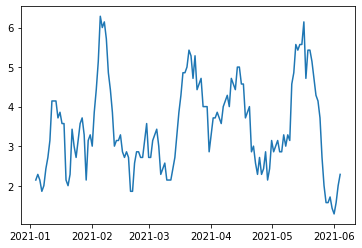

In [308]:
plt.plot(decomposicao.trend)

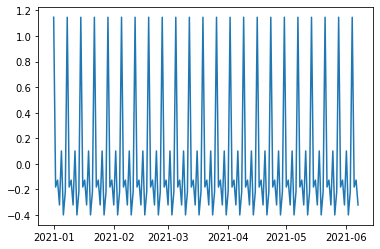

In [309]:
plt.plot(decomposicao.seasonal)

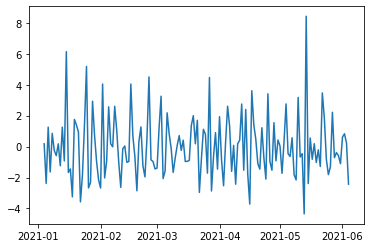

In [310]:
plt.plot(decomposicao.resid)

[]

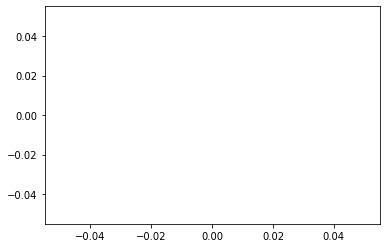

In [315]:
plt.plot()

In [293]:
ts.describe()

count     158
unique     13
top         3
freq       30
Name: quantidade, dtype: int64

In [312]:
ts = ts.astype('int64')

In [ ]:
auto = auto_arima(ts, m=31, seasonal=True, trace=False)

In [340]:
auto.order

(1, 0, 1)

In [337]:


modelo = ARIMA(ts, order=(1, 0, 1),freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()

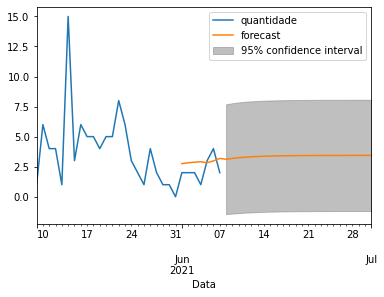

In [338]:
eixo = ts[-30:].plot()
modelo_treinado.plot_predict('2021-06-01', '2021-07-1',
                            ax=eixo, plot_insample=False)
pass;

In [336]:
modelo_auto.order

(1, 0, 1)